In [ ]:
Cliff Walking Example: SARSA Vs Q-Learning:

▶ Goal: To go from initial state to goal state without passing through the cliff area and in minimum number of steps
▶ Environment: Grid environment with multiple blocks as shown
▶ Rules:
■ Move only from one block to an adjacentblock in a step
■ Allowed to move in any direction except the diagonal
■ If you step in blue coloured blocks, you fall off the cliff and have to re-start

▶ States and Episodes:
■ Each block represents a state of the environment
■ Initial state and goal state are fixed
■ Episode ends when one reaches goal state or a cliff block
▶ Actions: Left, Right, Top, Down ▶ Reward Function:
■ Goal State : 0
■ Any Cliff State: -100
■ Any other state: -1

Figure 3: Cliff World Environment
Assignment: Write a python code to simulate the environment and find an optimal policy using SARSA and Q-Learning methods

In [1]:
### Author: Tammali Tharun(IITM, department of chemical engineering)

In [2]:
import gym
import random
import numpy as np
import matplotlib.pyplot as plt

env = gym.make('CliffWalking-v0')
state = env.reset()

### Actions:
- 0 - top
- 1 - right
- 2 - bottom
- 3 - left

# SARSA Algorithm

In [3]:
def policy_greedy(Q,epsilon,curr_state,env):
    best_action = np.argmax(Q[curr_state])
    A = np.ones(env.action_space.n, dtype=np.float32) * epsilon / env.action_space.n
    A[best_action]+= 1.0 - epsilon
    # print(A)
    return A

###  SARSA’s update rule is based on a random action taken in next state

- **Q(St,At)←Q(St,At)+α[Rt+1 +γQ(St+1,At+1)−Q(St,At)]**


In [4]:
def cliff_game_sarsa(T,alpha,gamma,epsilon):
    # Initialise: Q(s, a) ∀ s ∈ S, a ∈ A(s) arbitrarily
    env = gym.make('CliffWalking-v0')
    n_actions = env.action_space.n
    n_states = env.observation_space.n
    Q = np.zeros((n_states, n_actions))
    rewards = np.zeros(T)
    iterations = np.zeros(T)
    # print(Q)
    for t in range(T):
        curr_state = env.reset()[0]
        
        # Based on state St, take action At given by policy π based on current Q estimates
        action_prob = policy_greedy(Q,epsilon,curr_state,env)
        action = np.random.choice(np.arange(env.action_space.n), p=action_prob)
        done = False
        episodic_reward = 0
        iter = 0
        
        while not done:
            iter+=1    
            # Observe Rt+1 and St+1
            next_state,reward,done,trun,prob = env.step(action)

            if done:
                Q[curr_state][action]+= alpha*(reward + gamma*(0.0) - Q[curr_state][action])
                # print(curr_state,iter,episodic_reward)
                iterations[t] = iter
                break
            else:
                # print(curr_state,action,reward)
                # Observe At+1
                next_action_prob = policy_greedy(Q,epsilon,next_state,env)
                next_action = np.random.choice(np.arange(env.action_space.n), p=next_action_prob)
                
                # Update Q-value of (St,At): Q(St,At) ← Q(St,At) + α[Rt+1 + γQ(St+1,At+1) − Q(St,At)]
                Q[curr_state][action]+= alpha*(reward + gamma*(Q[next_state][next_action]) - Q[curr_state][action])
                
                curr_state = next_state
                action = next_action
            episodic_reward+= reward
                
        rewards[t] = episodic_reward
    
    return Q,rewards,iterations


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


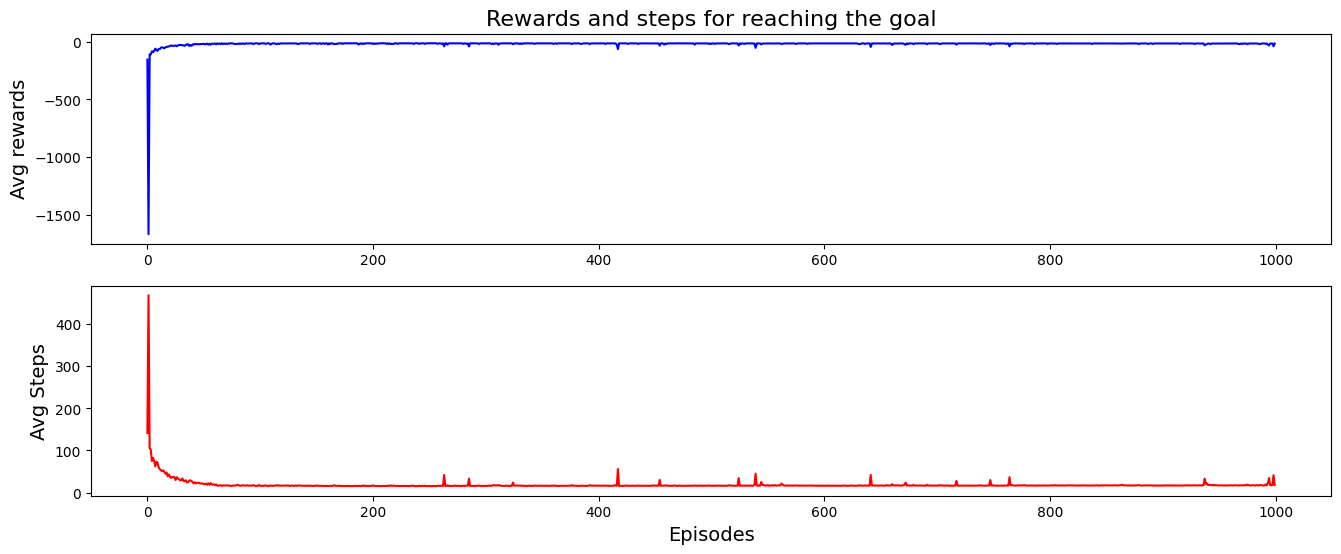

In [5]:

alpha = 0.5 
gamma = 0.9  
epsilon = 0.01
num_rounds=20
T = 1000
total_iterations = np.zeros((num_rounds, T))
total_rewards = np.zeros((num_rounds, T))
for n in range(num_rounds):
    # print(n)
    Q, rewards,iterations = cliff_game_sarsa(T,alpha,gamma,epsilon)
    total_iterations[n] = iterations
    # print(iterations)
    total_rewards[n] = rewards
    
mean_rewards = np.mean(total_rewards, axis=0)
mean_iterations = np.mean(total_iterations, axis=0)

fig, axs = plt.subplots(2,1,figsize=(16,6), gridspec_kw={'height_ratios': [1, 1]})
axs[0].set_title('Rewards and steps for reaching the goal', fontsize = 16)
axs[0].plot(mean_rewards,color='b')
axs[0].set_ylabel('Avg rewards', fontsize = 14)
axs[1].plot(mean_iterations,color='r')
axs[1].set_xlabel('Episodes', fontsize = 14)
axs[1].set_ylabel('Avg Steps', fontsize = 14)
#axs[1].scatter(z['level_1'], z['level_0'],c=z[0])
plt.show()


### Obeservations:

- After running for 1000 rounds using the SARSA algorithm on the Cliff Game example.
- I have derived an optimal policy that effectively navigates the agent through the grid while avoiding the cliff.
- This optimal policy serves as a robust strategy for navigating the Cliff Game environment.